# Analyzing the dataset
## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import os
#import tensorflow         mvhf        

In [2]:
#from keras.models import Sequential, load_model ,Model
#from keras.layers import GlobalAveragePooling2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
#from keras.applications.vgg19 import VGG19, preprocess_input
#from keras.optimizers import SGD

In [3]:
train_path = "C:/Users/prana/Projects/Bone_break_classification/data/TRAIN_B" # Path of training data
test_path = "C:/Users/prana/Projects/Bone_break_classification/data/TEST_B" # Path of testing data

## Importing the Dataset

In [4]:
BATCH_SIZE = 32 # Each batch will contain 32 images

# Creating Generator object
train_datagen = ImageDataGenerator(rescale= 1./255)  

test_datagen = ImageDataGenerator(rescale= 1./255)

In [5]:
train_dataset = train_datagen.flow_from_directory(    # Importing training data directly from directory
        train_path,
        shuffle=True,
        target_size= (224,224),
        batch_size = BATCH_SIZE,
        color_mode= "rgb",
        class_mode= "categorical")

validation_dataset = test_datagen.flow_from_directory(  # Importing validation data directly from directory
        test_path,
        shuffle=True,
        target_size= (224,224),
        batch_size = BATCH_SIZE,
        color_mode= "rgb",
        class_mode= "categorical") 

Found 5752 images belonging to 2 classes.
Found 1215 images belonging to 2 classes.


## Understanding the data

In [6]:
nb_train_samples = len(train_dataset.filenames)           # Number of Training samples
num_classes = len(train_dataset.class_indices)            # Number of classes in Train dataset
nb_validate_samples = len(validation_dataset.filenames)   # Number of validation samples
num_classes_v = len(validation_dataset.class_indices)     # Number of classes in validation dataset
train_labels = train_dataset.classes                      # Labels for Train dataset
val_labels = validation_dataset.classes                   # Labels for validation dataset


print("nb_train_samples :",nb_train_samples) 
print("num_classes :",num_classes)
print("num_classes_v :",num_classes_v)
print("nb_validation_samples :",nb_validate_samples)
print("train_labels :",train_labels)
print("val_labels :",val_labels)

nb_train_samples : 5752
num_classes : 2
num_classes_v : 2
nb_validation_samples : 1215
train_labels : [0 0 0 ... 1 1 1]
val_labels : [0 0 0 ... 1 1 1]


In [7]:
x_data = [] 
y_data = [] 

# Creating a pandas dataframe with images in X column and labels in Y column
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 2880/2880 [00:04<00:00, 637.36it/s]


In [8]:
from collections import Counter
data.shape
Counter(y_data)

Counter({'TRAIN_B\\not_fractured': 2880, 'TRAIN_B\\fractured': 2872})

## Data vizualization

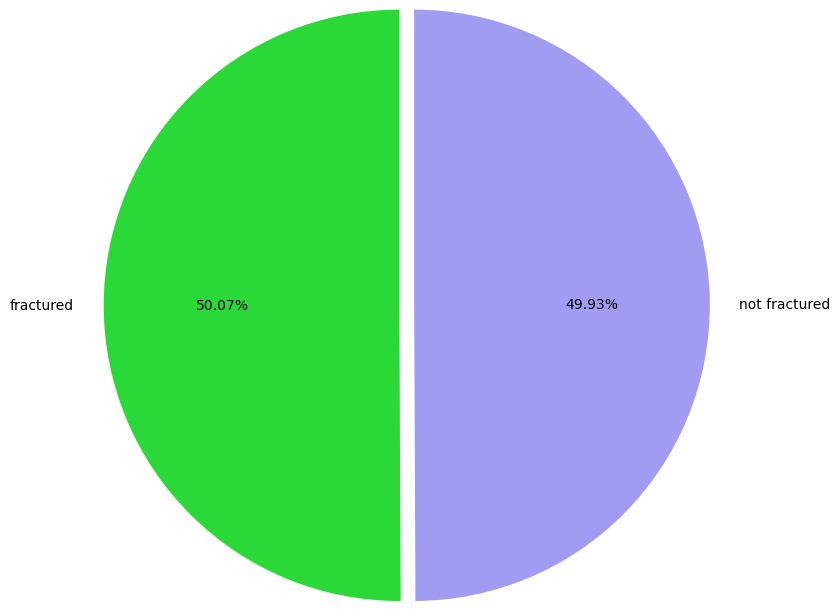

In [9]:
colors = ['#2ad938','#a19cf1']

# Pie chart to see the proportions as a large gap would significantly affect our model performance negatively
plt.pie(
    data['label'].value_counts(),
    startangle=90,
    explode=[0.05,0.05],
    autopct='%0.2f%%',
    labels=['fractured', 'not fractured'], 
    colors= colors,
    radius=2
)
plt.show()

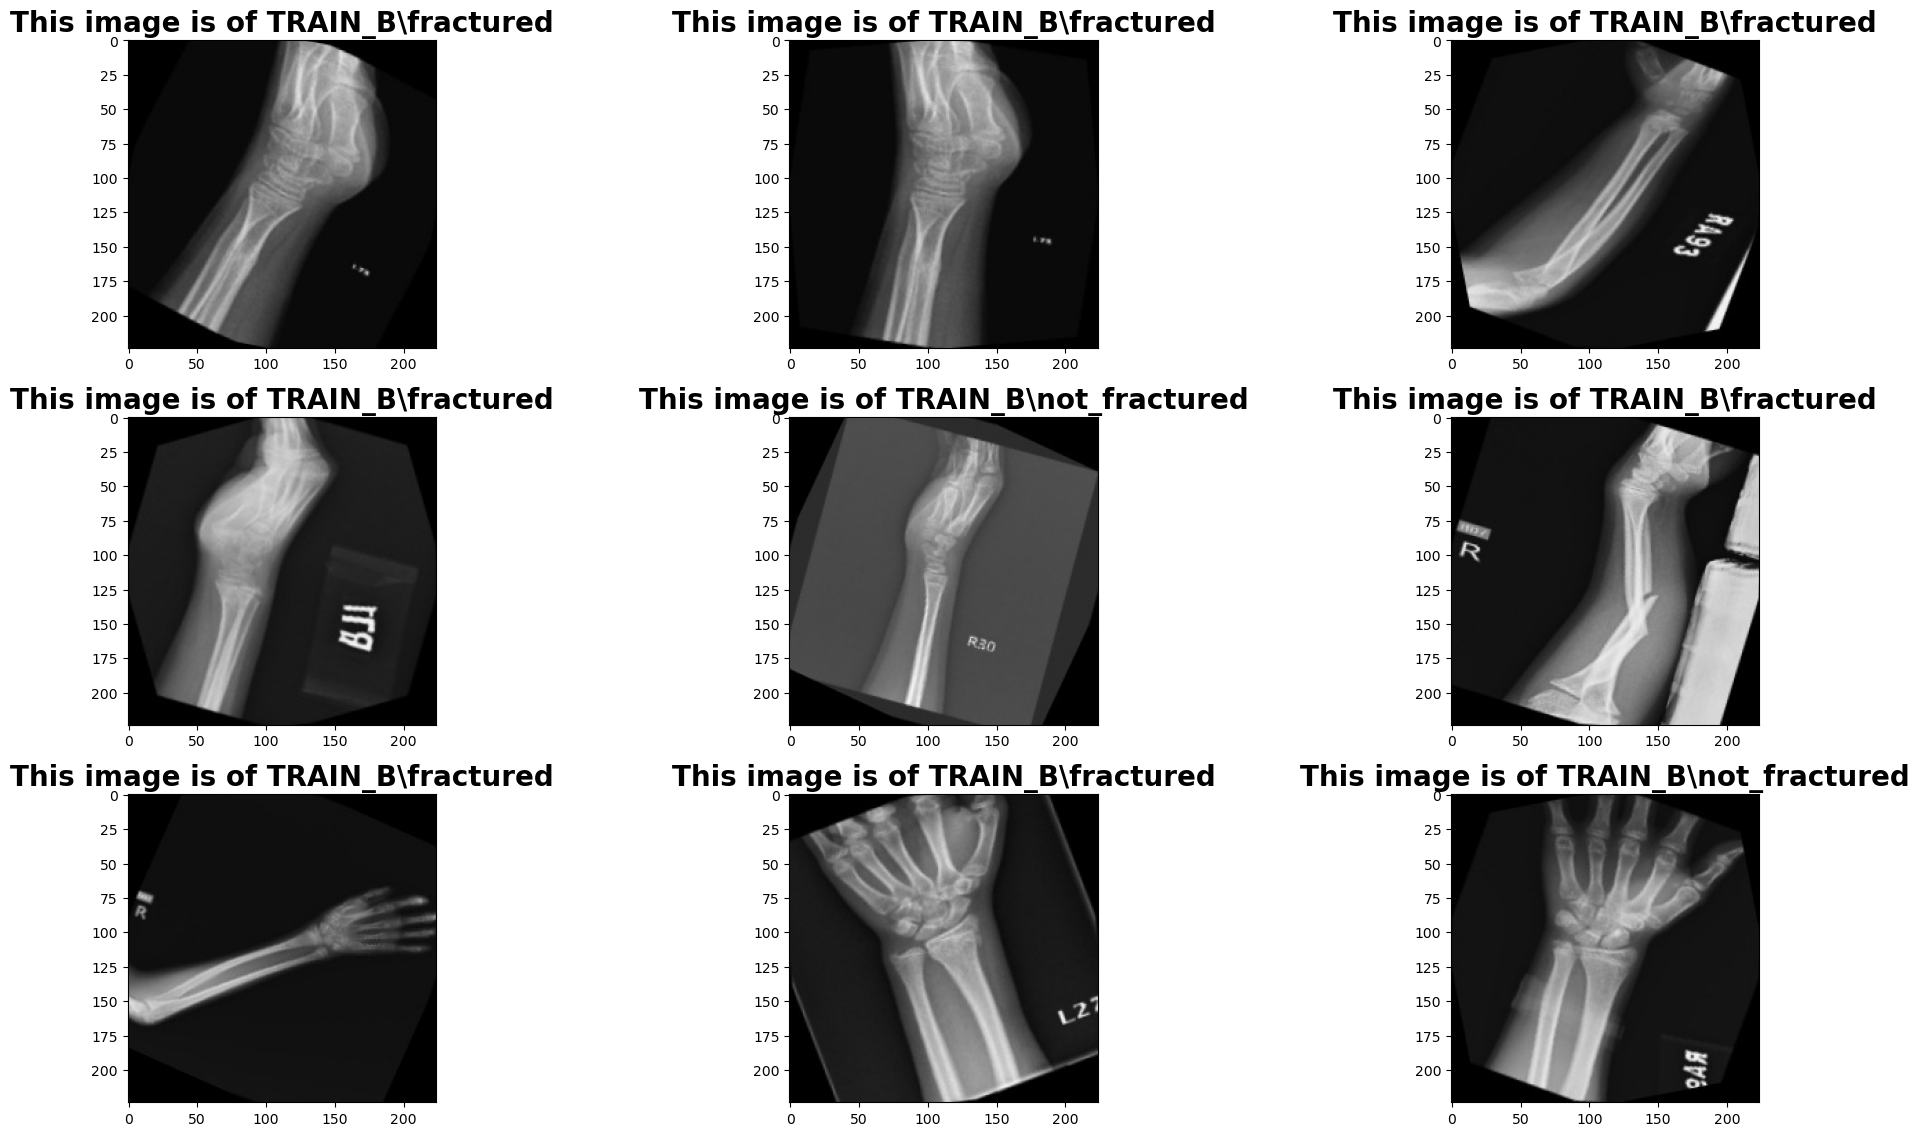

In [10]:
plt.figure(figsize=(20,15))

# some more plotting
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(5000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()